In [39]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import astropy.io as aio
import numpy as np

In [ ]:
fits_bright = ('edr3_nearby_brightest.fits')
fits_close = ('edr3_nearby_closest.fits')
hdul = fits.open(fits_bright)
hdul.info()
tab= Table.read('edr3_nearby_brightest.fits')
df=tab.to_pandas()
print(df.head())
df.columns.values

Filename: edr3_nearby_brightest.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  table1c.dat    1 BinTableHDU    384   1003R x 74C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, I, D, D, 19A, 1A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 20A, 19A, D, D, D, D, D, D, D, D, 17A, D, D, D, D, D, D, 20A, D, D, D, D, D, D, D, D]   
              GaiaEDR3     RAdeg  e_RAdeg      DEdeg  e_DEdeg     Plx  \
0  4684097178470252032  0.397619  0.07242 -77.066511  0.08434  15.455   
1  2414783622022208128  0.935067  0.14239 -17.336031  0.07588  10.508   
2  2444348733779214976  1.333868  0.30749  -5.707223  0.15042  23.515   
3  4990516294443333504  2.353434  0.09015 -45.748222  0.09247  22.608   
4  4630854015089595776  2.508328  0.04942 -82.224137  0.04661  12.353   

     e_Plx     pmRA   e_pmRA     pmDE  ...  e_Ksmag  WISE  W1mag  e_W1mag  \
0  0.09160  -56.841  0.11043 -176.791  .

array(['GaiaEDR3', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'Plx', 'e_Plx',
       'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Gmag', 'RFG', 'BPmag', 'RFBP',
       'RPmag', 'RFRP', 'E(BP/RP)', 'RUWE', 'IPDfmp', 'RV', 'e_RV',
       'r_RV', 'f_RV', 'GCNSprob', 'WDprob', 'Dist1', 'Dist16', 'Dist50',
       'Dist84', 'xcoord50', 'xcoord16', 'xcoord84', 'ycoord50',
       'ycoord16', 'ycoord84', 'zcoord50', 'zcoord16', 'zcoord84',
       'Uvel50', 'Uvel16', 'Uvel84', 'Vvel50', 'Vvel16', 'Vvel84',
       'Wvel50', 'Wvel16', 'Wvel84', 'GUNN', 'r_GUNN', 'gmag', 'e_gmag',
       'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', '2MASS',
       'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Ksmag', 'e_Ksmag', 'WISE',
       'W1mag', 'e_W1mag', 'W2mag', 'e_W2mag', 'W3mag', 'e_W3mag',
       'W4mag', 'e_W4mag'], dtype=object)

In [41]:
with fits.open('edr3_nearby_brightest.fits', mode="readonly") as hdulist:
    dist = hdulist[1].data['Dist50']
    mag = hdulist[1].data['Gmag']
abs_mag=(mag-(5*(np.log10(dist)-1)))
type(dist)

numpy.ndarray

In [53]:
with fits.open('edr3_nearby_closest.fits', mode="readonly") as hdulist:
    dist2 = hdulist[1].data['Dist50']
    mag2 = hdulist[1].data['Gmag']
    RPmag2 = hdulist[1].data['RPmag']
    BPmag2 = hdulist[1].data['BPmag']
abs_mag2=(mag2-(5*(np.log10(dist2)-1)))
x2 = (BPmag2-RPmag2)

In [44]:
with fits.open('edr3_nearby_brightest.fits', mode="readonly") as hdulist:
    RPmag = hdulist[1].data['RPmag']
    BPmag = hdulist[1].data['BPmag']
x = (BPmag-RPmag)

(-0.5, 3.0)

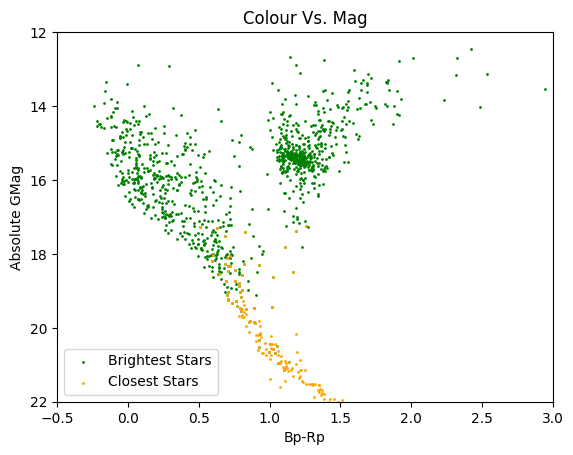

In [56]:
plt.scatter(x,abs_mag,s=1,label='Brightest Stars', c='green')
plt.scatter(x2,abs_mag2,s=1,label='Closest Stars', c='orange')
plt.ylabel('Absolute GMag')
plt.legend()
plt.xlabel('Bp-Rp')
plt.title('Colour Vs. Mag')
plt.ylim(22,12)
plt.xlim(-0.5,3)

In [ ]:
 #only elements above 5
red = np.logical_and(abs_mag < 17, x > 1)
print(red)


[ True False  True ...  True  True False]


(-0.5, 3.0)

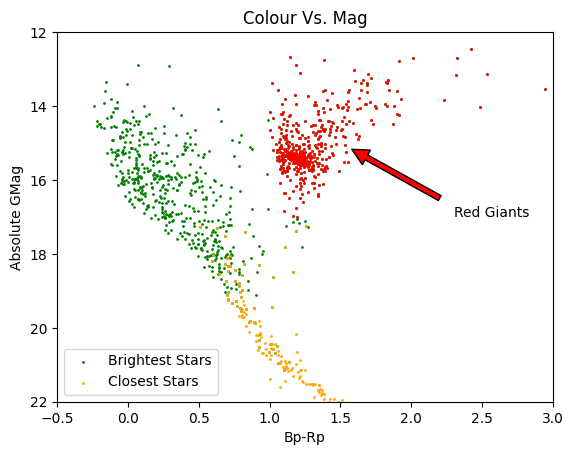

In [87]:
plt.scatter(x,abs_mag,s=1,label='Brightest Stars', c='green')
plt.scatter(x2,abs_mag2,s=1,label='Closest Stars', c='orange')
plt.scatter(x[red],abs_mag[red],s=1, c='red')
plt.ylabel('Absolute GMag')
plt.legend()
plt.xlabel('Bp-Rp')
plt.title('Colour Vs. Mag')
plt.annotate('Red Giants',(1.5,15),xytext=(2.3,17),
             arrowprops=dict(facecolor='red', shrink=0.1))
plt.ylim(22,12)
plt.xlim(-0.5,3)